<a href="https://colab.research.google.com/github/Swathi-Thandavarayan/Predicting-Customer-Churn-in-Subscription-Services/blob/main/Customer_Churn_Prediction_and_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn Prediction and Prevention

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [97]:
# from google.colab import drive
# drive.mount('/content/drive')

In [98]:
file_path = "/content/Customer-Churn-Prediction.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
df.shape

(7043, 21)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##DATA CLEANING

In [102]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [103]:
df.customerID.nunique()

7043

hence no duplicates

In [104]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [105]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [106]:
df.gender.dtype

dtype('O')

In [107]:
df.SeniorCitizen.nunique()

2

In [108]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5900
1    1143
Name: count, dtype: int64

In [109]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [110]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [111]:
df['MultipleLines'].value_counts()


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [112]:
df.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [113]:
df.TotalCharges.nunique()

6531

In [114]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)


In [115]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with 0 if needed
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert 'TotalCharges' to integers
df['TotalCharges'] = df['TotalCharges'].astype(float)

# DATA VISUALISATION

CLASSIFIACTION MODEL
target column = 'Churn'

Cato columns = ('tenure', 'MonthlyCharges', 'TotalCharges')

contnus clm =(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

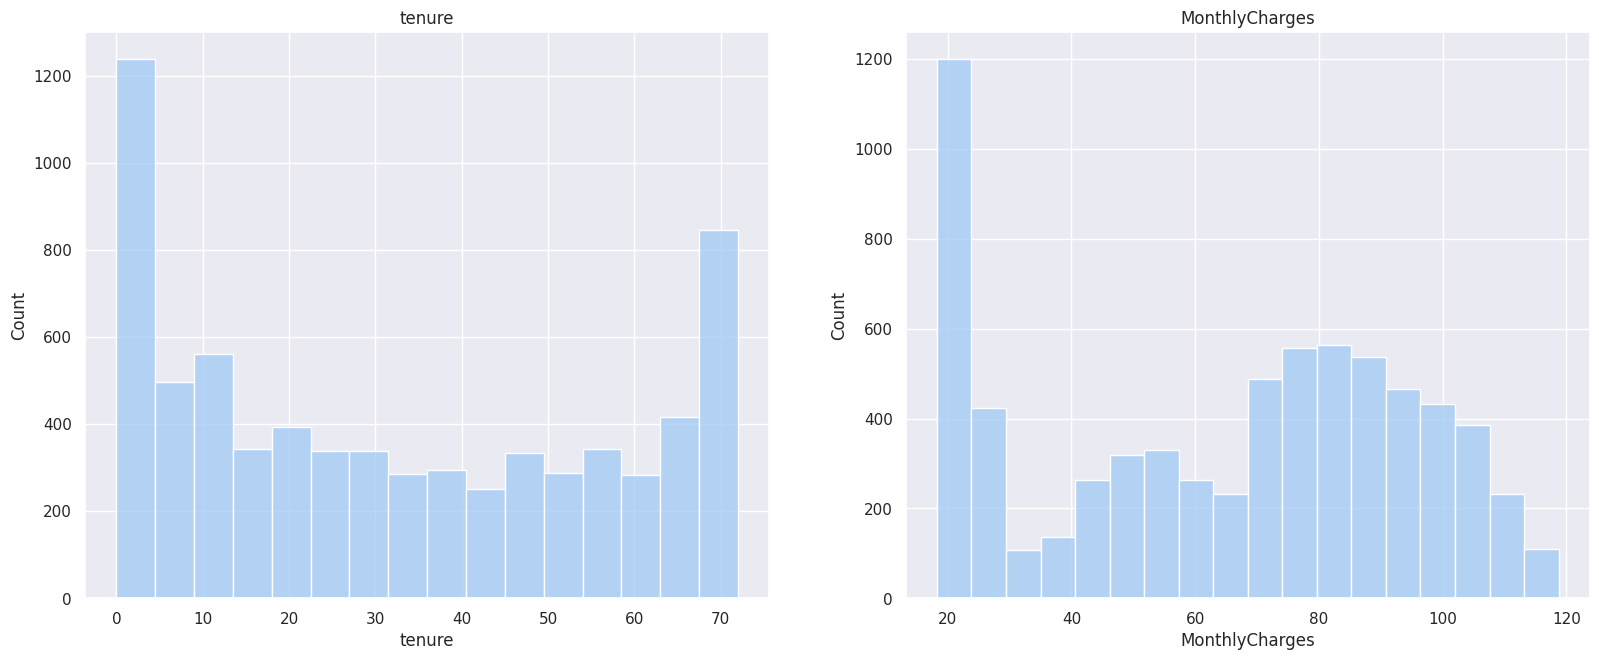

<Figure size 640x480 with 0 Axes>

In [116]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.histplot(df['tenure'])
plt.title('tenure')
plt.xlabel('tenure')
plt.ylabel('Count')

plt.subplot(332)
sns.histplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')


plt.show()
plt.tight_layout()

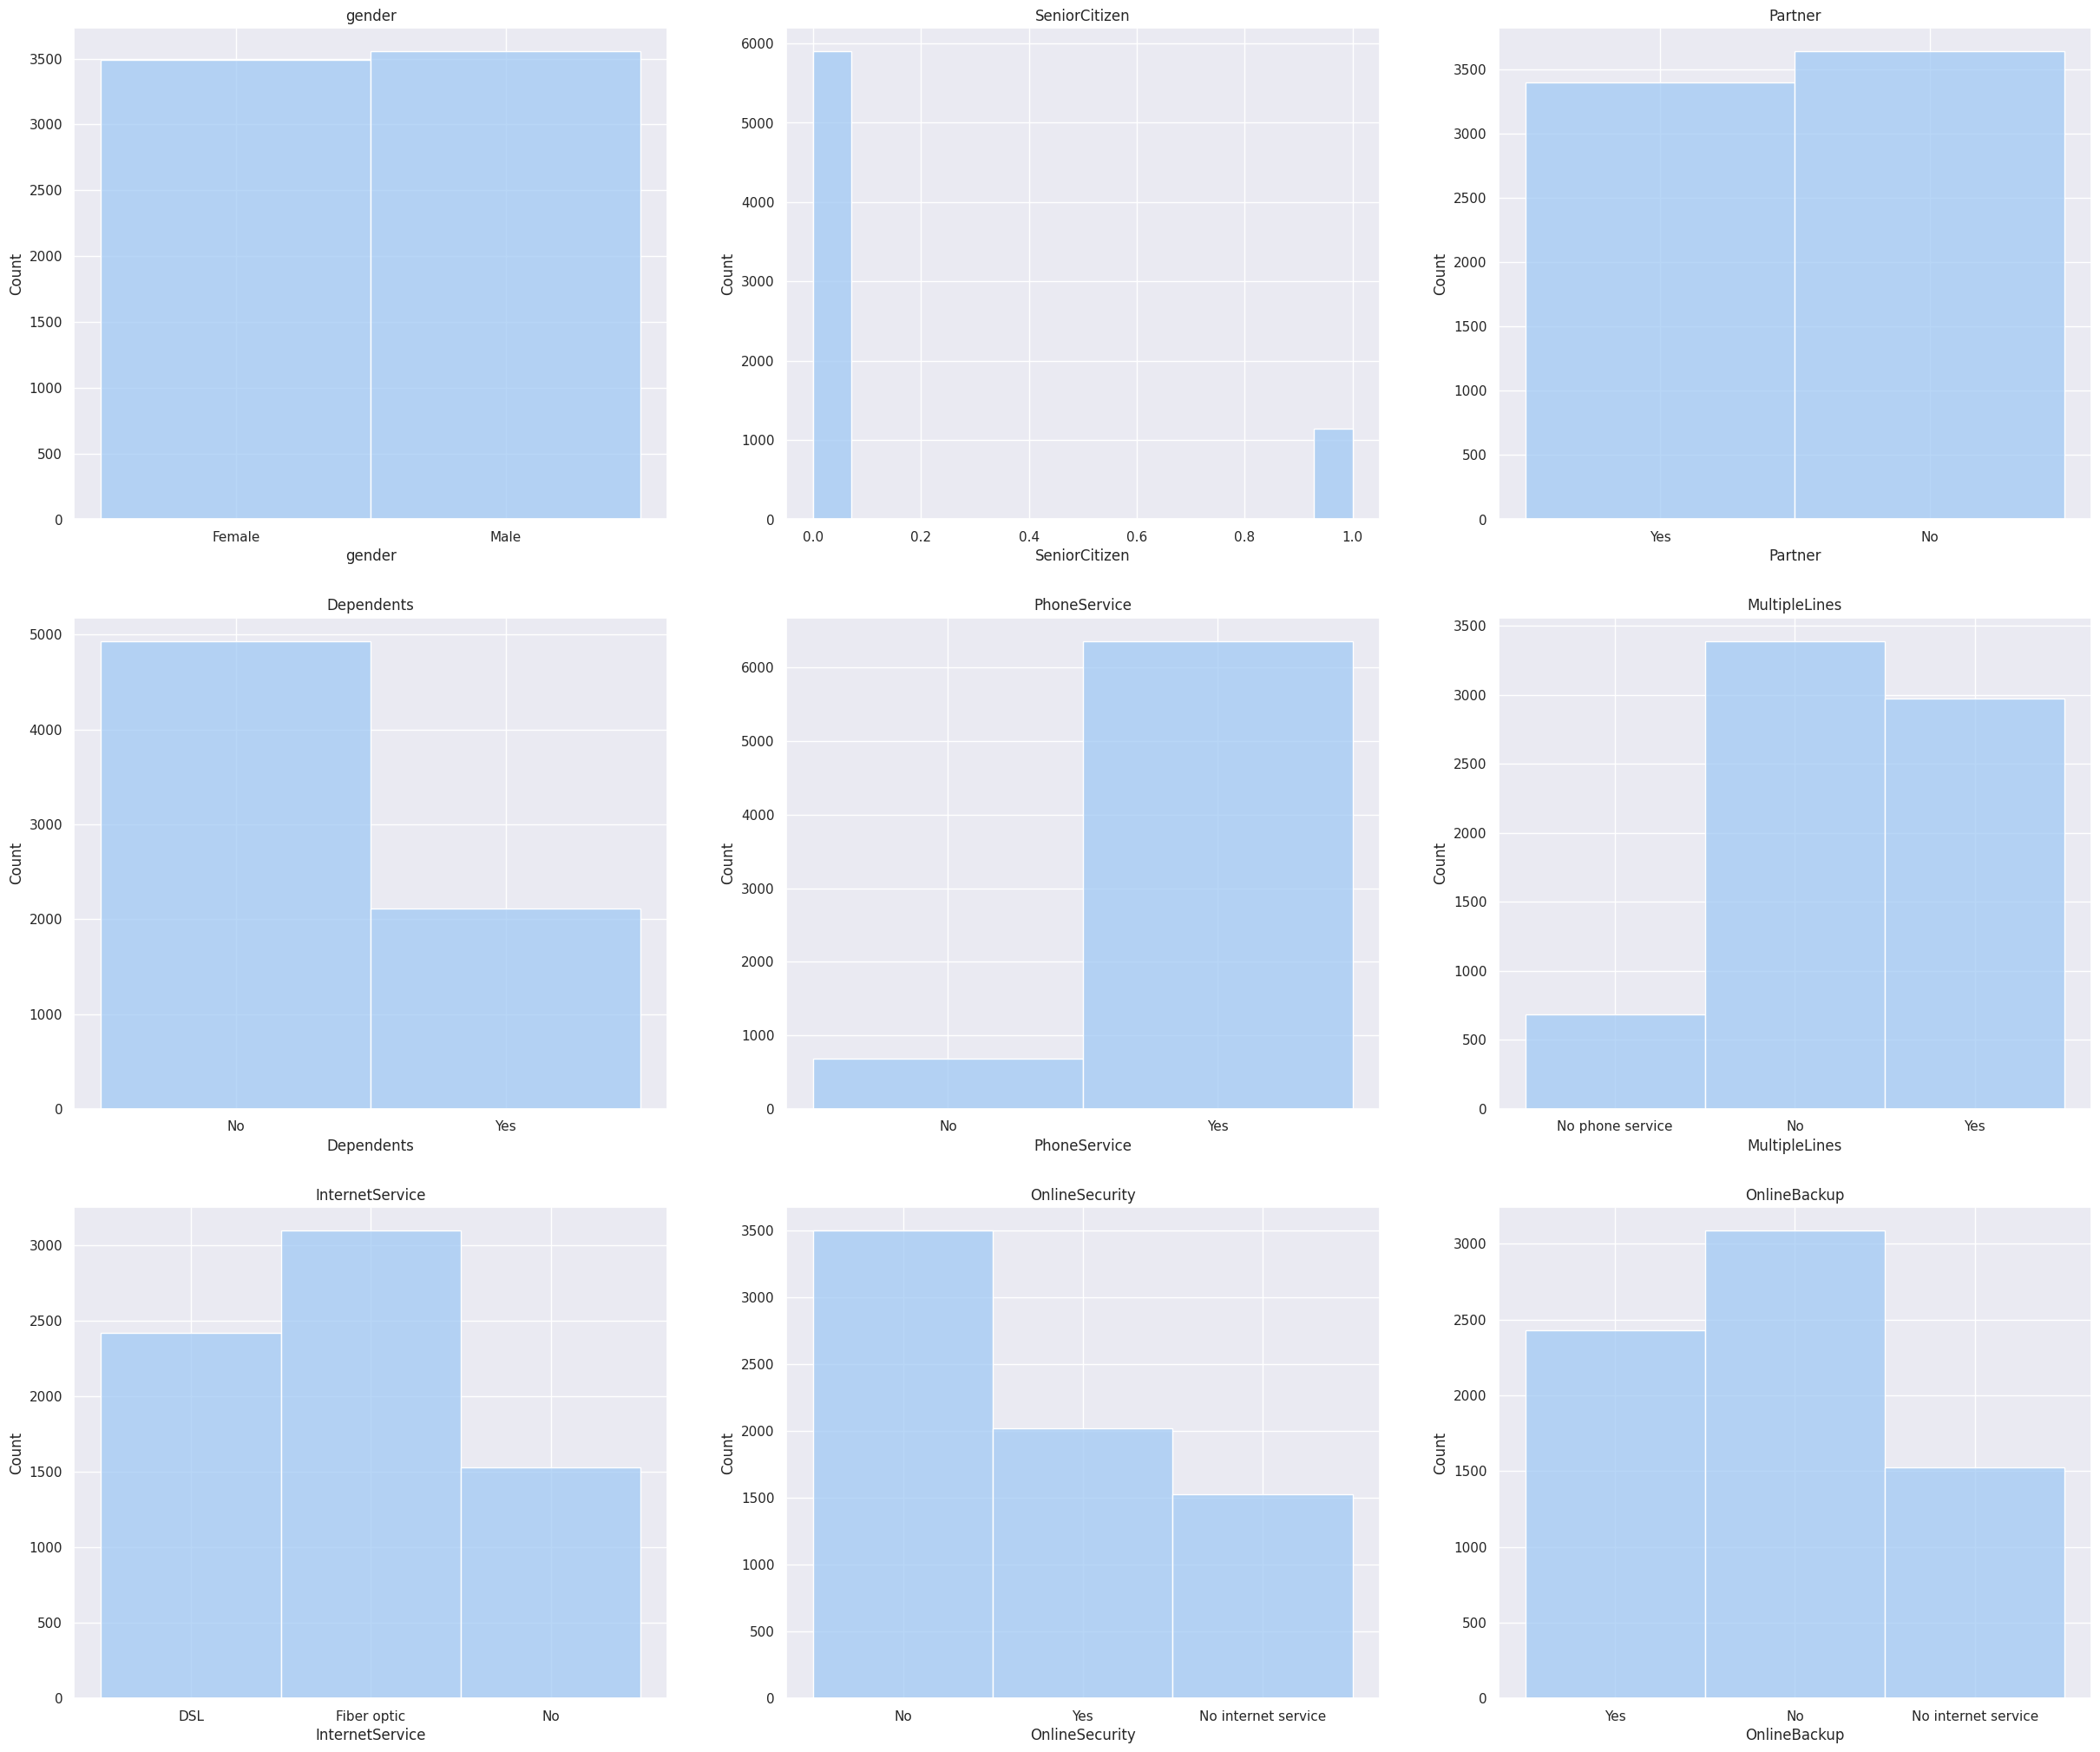

<Figure size 640x480 with 0 Axes>

In [117]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.histplot(x =df['gender'])
plt.title('gender')
plt.xlabel('gender')
plt.ylabel('Count')

plt.subplot(332)
sns.histplot(x =df['SeniorCitizen'])
plt.title('SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

plt.subplot(333)
sns.histplot(x =df['Partner'])
plt.title('Partner')
plt.xlabel('Partner')
plt.ylabel('Count')

plt.subplot(334)
sns.histplot(x =df['Dependents'])
plt.title('Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

plt.subplot(335)
sns.histplot(x =df['PhoneService'])
plt.title('PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')

plt.subplot(336)
sns.histplot(x =df['MultipleLines'])
plt.title('MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')

plt.subplot(337)
sns.histplot(x =df['InternetService'])
plt.title('InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')

plt.subplot(338)
sns.histplot(x =df['OnlineSecurity'])
plt.title('OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')

plt.subplot(339)
sns.histplot(x =df['OnlineBackup'])
plt.title('OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')



plt.show()
plt.tight_layout()

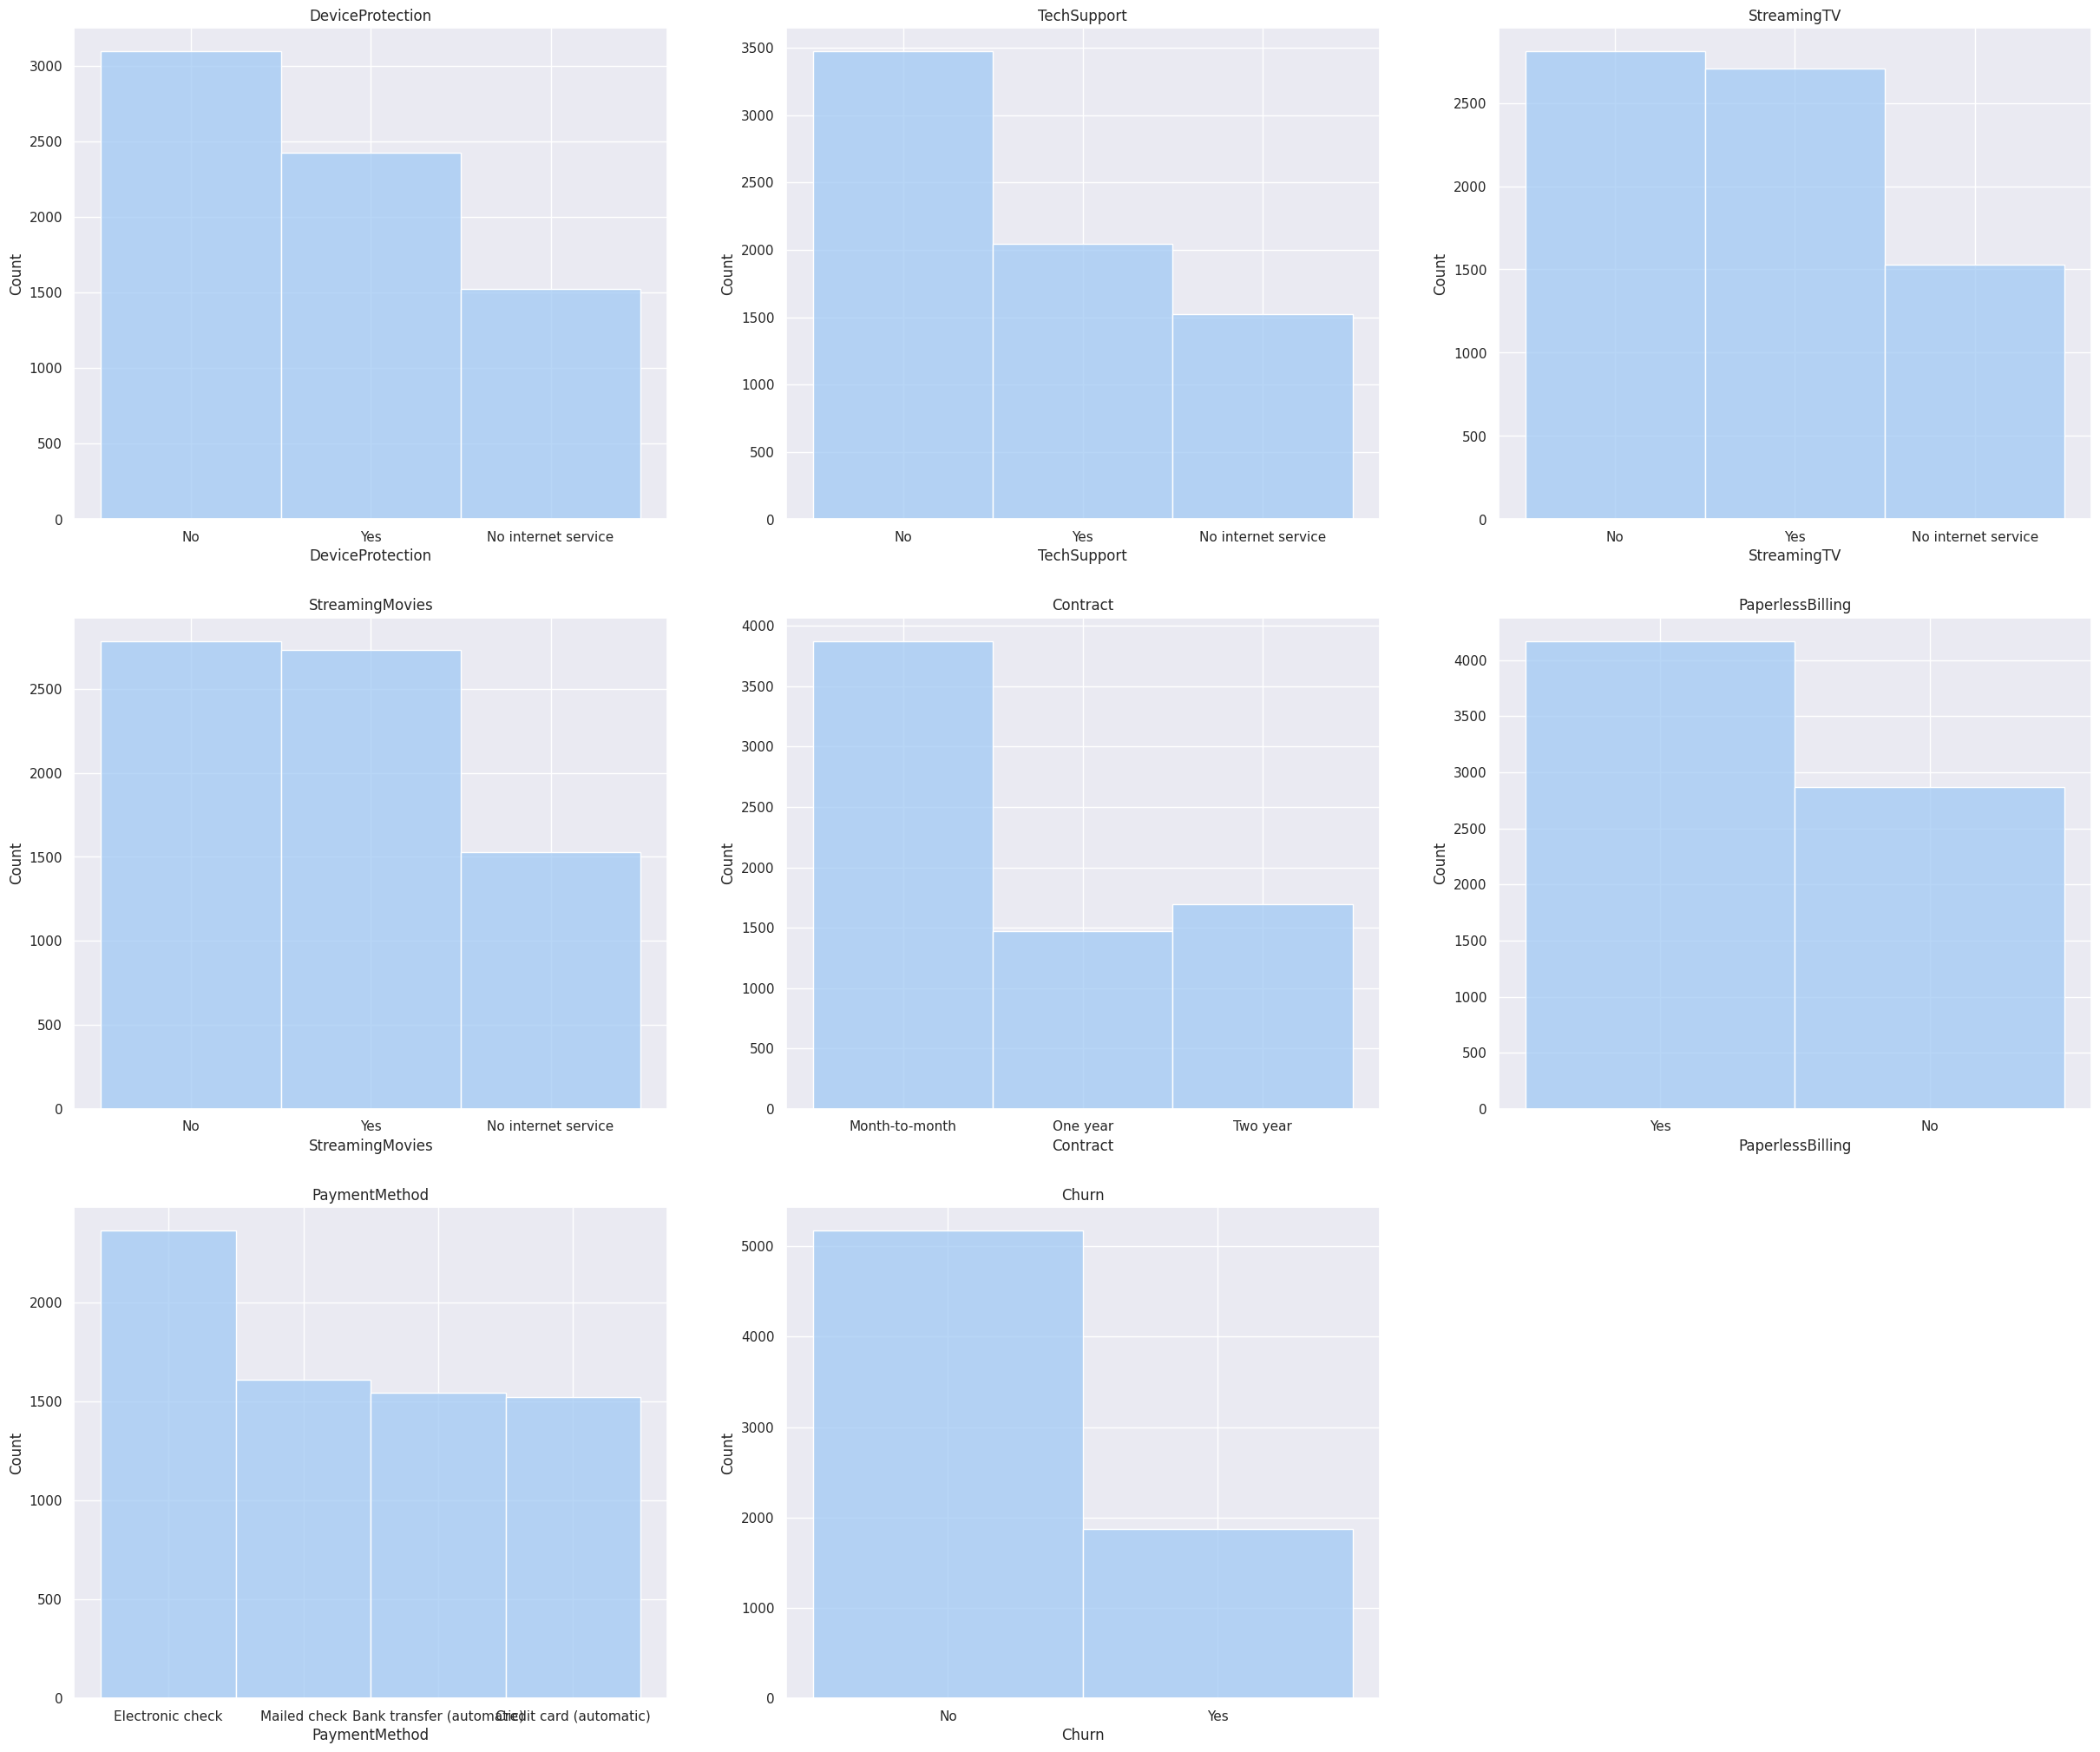

<Figure size 640x480 with 0 Axes>

In [118]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.histplot(x =df['DeviceProtection'])
plt.title('DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')

plt.subplot(332)
sns.histplot(x =df['TechSupport'])
plt.title('TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')

plt.subplot(333)
sns.histplot(x =df['StreamingTV'])
plt.title('StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')

plt.subplot(334)
sns.histplot(x =df['StreamingMovies'])
plt.title('StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')

plt.subplot(335)
sns.histplot(x =df['Contract'])
plt.title('Contract')
plt.xlabel('Contract')
plt.ylabel('Count')

plt.subplot(336)
sns.histplot(x =df['PaperlessBilling'])
plt.title('PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')

plt.subplot(337)
sns.histplot(x =df['PaymentMethod'])
plt.title('PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')

plt.subplot(338)
sns.histplot(x =df['Churn'])
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('Count')


plt.show()
plt.tight_layout()

TARGET  VS FEATURE

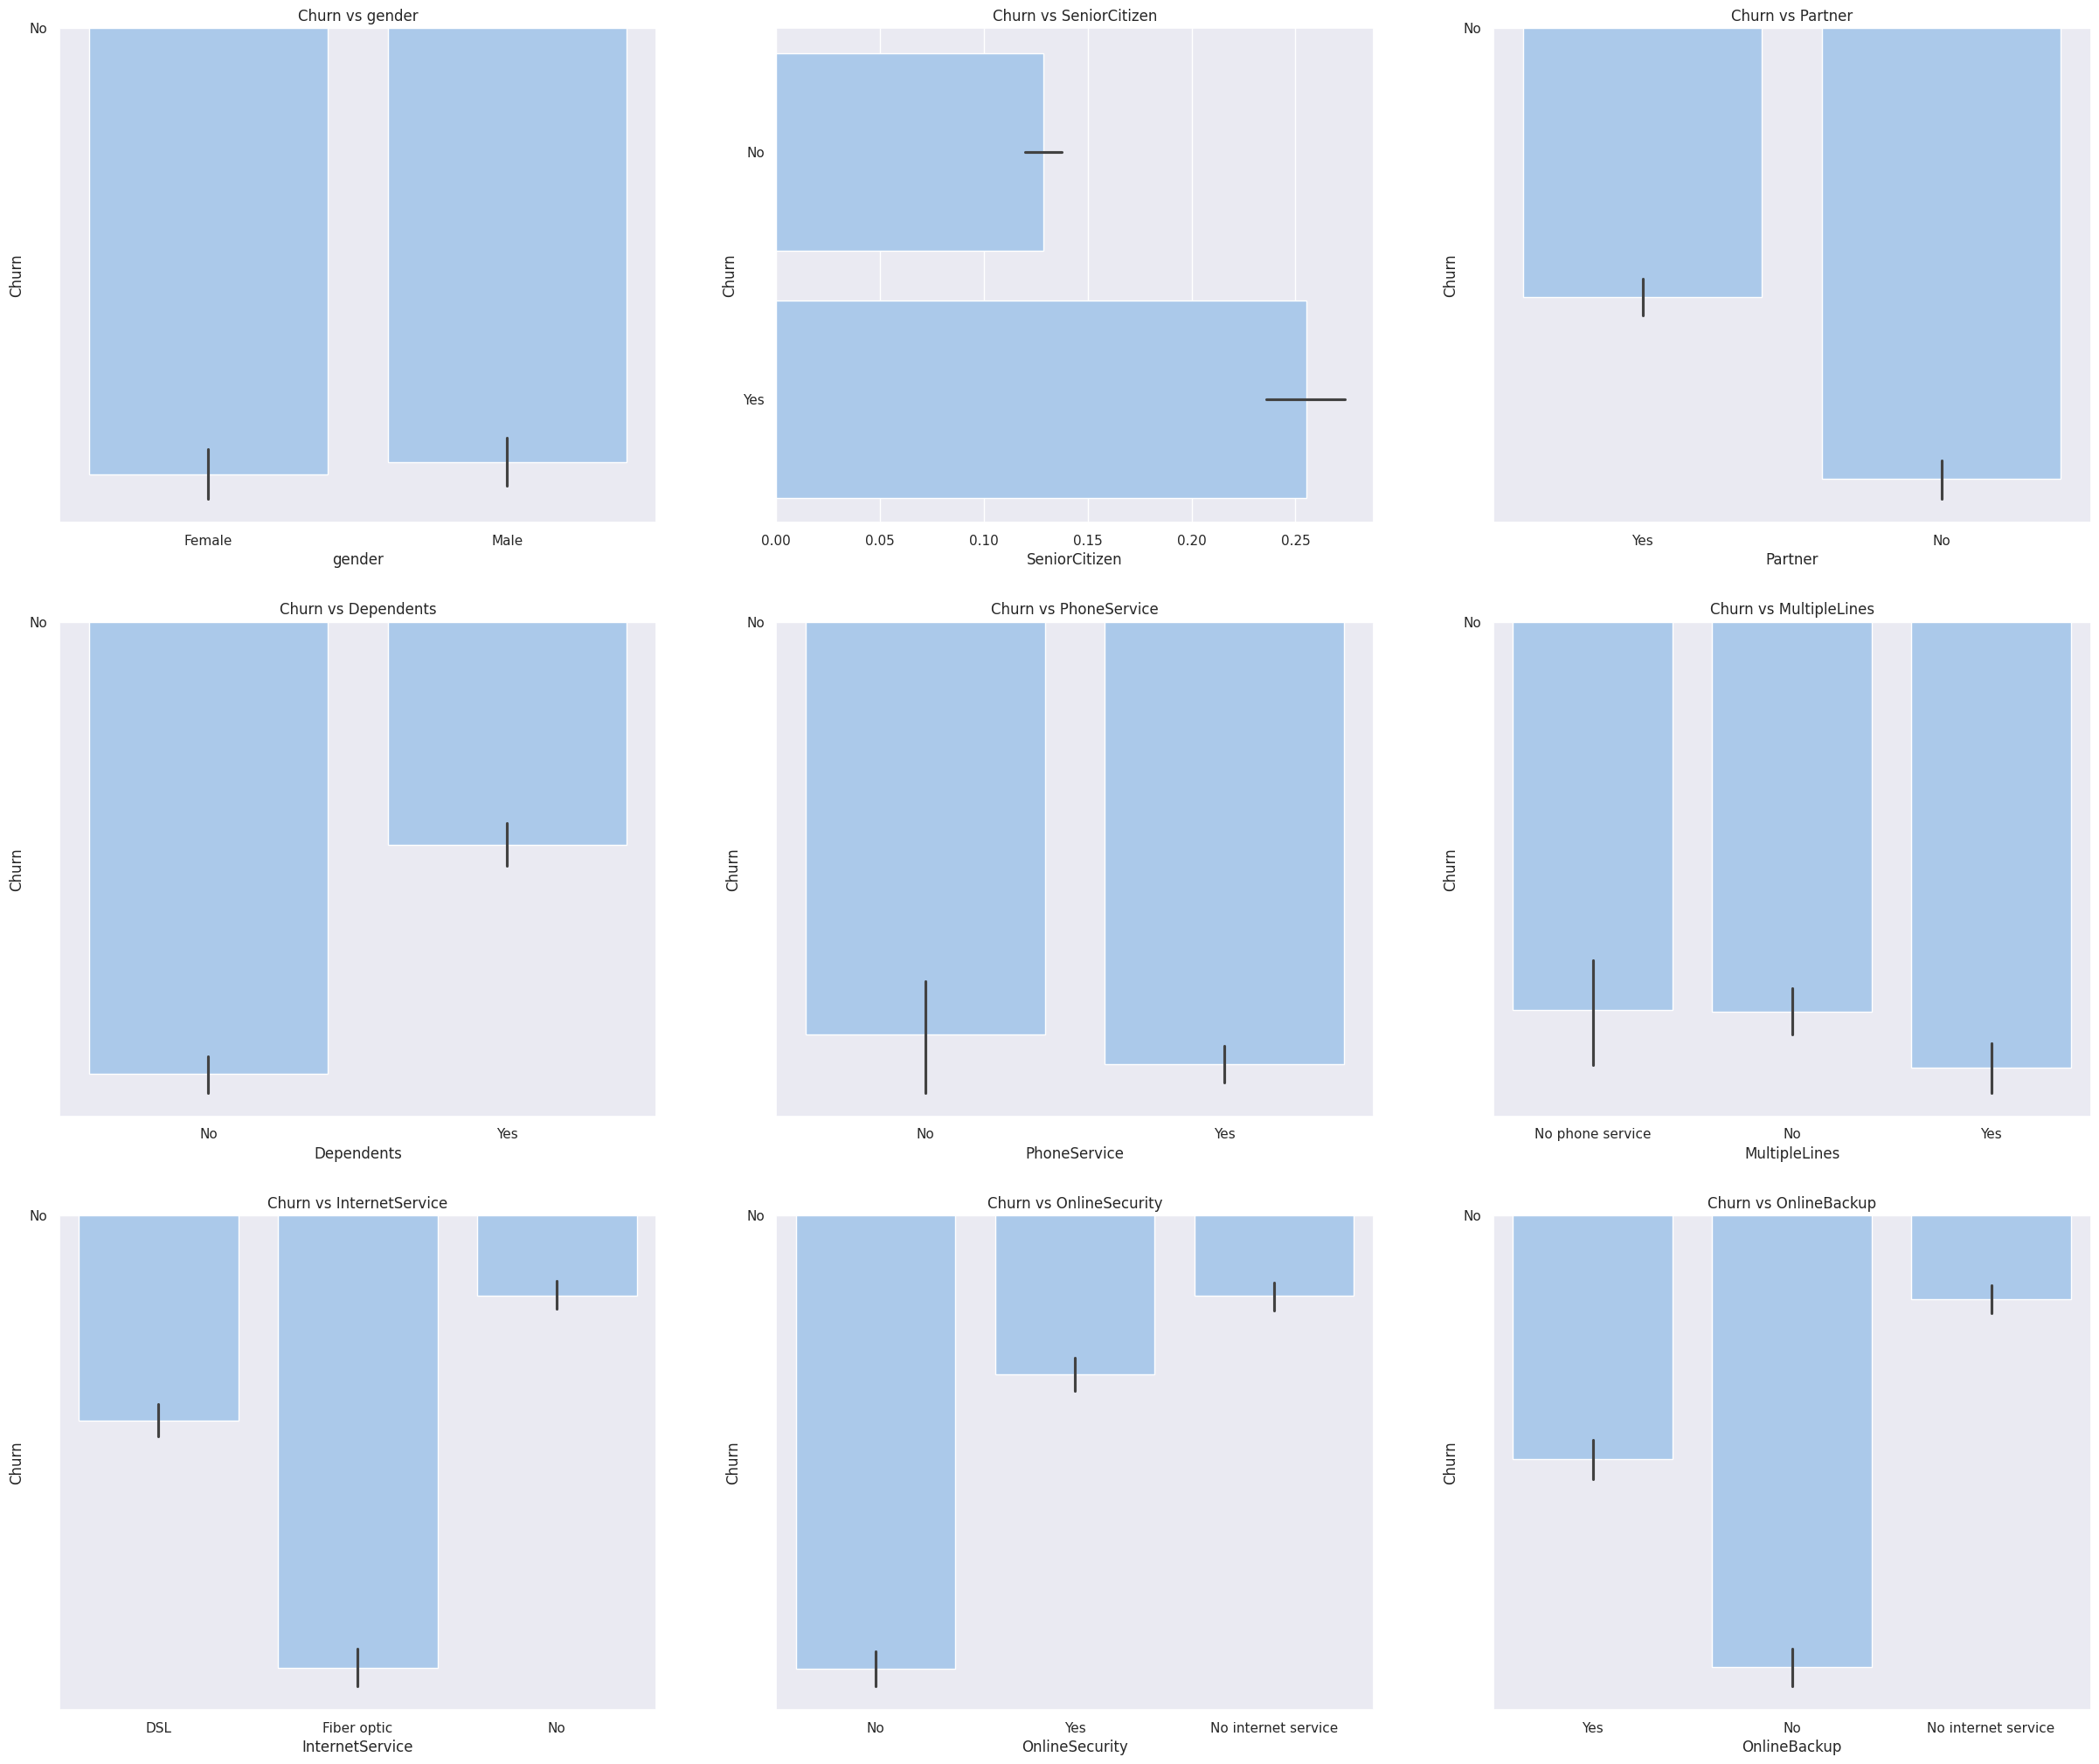

<Figure size 640x480 with 0 Axes>

In [119]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.barplot(x =df['gender'], y = df['Churn'])
plt.title('Churn vs gender')
plt.xlabel('gender')
plt.ylabel('Churn')

plt.subplot(332)
sns.barplot(x =df['SeniorCitizen'], y = df['Churn'])
plt.title('Churn vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')

plt.subplot(333)
sns.barplot(x =df['Partner'], y = df['Churn'])
plt.title('Churn vs Partner')
plt.xlabel('Partner')
plt.ylabel('Churn')

plt.subplot(334)
sns.barplot(x =df['Dependents'], y = df['Churn'])
plt.title('Churn vs Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn')

plt.subplot(335)
sns.barplot(x =df['PhoneService'], y = df['Churn'])
plt.title('Churn vs PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Churn')

plt.subplot(336)
sns.barplot(x =df['MultipleLines'], y = df['Churn'])
plt.title('Churn vs MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Churn')

plt.subplot(337)
sns.barplot(x =df['InternetService'], y = df['Churn'])
plt.title('Churn vs InternetService')
plt.xlabel('InternetService')
plt.ylabel('Churn')

plt.subplot(338)
sns.barplot(x =df['OnlineSecurity'], y = df['Churn'])
plt.title('Churn vs OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn')

plt.subplot(339)
sns.barplot(x =df['OnlineBackup'], y = df['Churn'])
plt.title('Churn vs OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Churn')




plt.show()
plt.tight_layout()

#ENCODING

In [120]:
df = df.drop('customerID',axis=1)

In [121]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
df['gender'] = df['gender'].map({'Female':1,'Male': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, "No":0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, "No":0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, "No":0})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service':2,'No': 0, "Yes":1})
df['InternetService'] = df['InternetService'].map({'No':0,'DSL': 1, "Fiber optic":2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service':2,'No': 0, "Yes":1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service':2,'No': 0, "Yes":1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service':2,'No': 0, "Yes":1})
df['TechSupport'] = df['TechSupport'].map({'No internet service':2,'No': 0, "Yes":1})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service':2,'No': 0, "Yes":1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service':2,'No': 0, "Yes":1})
df['Contract'] = df['Contract'].map({'Month-to-month':0,'One year': 1, "Two year":2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, "No":0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check':0,'Mailed check': 1, "Bank transfer (automatic)":2, "Credit card (automatic)":3})
df['Churn'] = df['Churn'].map({'Yes': 1, "No":0})

In [123]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


#correlation map

In [125]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001492,0.001808,-0.010517,-0.005095,0.006488,0.000485,0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001341,0.000191,-0.000126,0.011754,0.005209,0.014569,0.000080,0.008612
SeniorCitizen,0.001492,1.000000,0.016101,-0.211362,0.016090,0.008699,0.099487,0.259188,-0.211171,-0.153111,-0.157424,-0.224041,-0.130589,-0.121175,-0.142823,0.156794,-0.093106,0.219856,0.102597,0.151477
Partner,0.001808,0.016101,1.000000,0.452676,0.379689,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.079953,0.075779,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,-0.010517,-0.211362,0.452676,1.000000,0.159722,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140284,0.125820,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,-0.005095,0.016090,0.379689,0.159722,1.000000,0.008445,0.242274,0.033219,0.145295,0.178650,0.178662,0.144471,0.135947,0.140795,0.671623,0.006143,0.340322,0.247890,0.826172,-0.352251
PhoneService,0.006488,0.008699,0.017706,-0.001762,0.008445,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171612,0.165205,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,0.000485,0.099487,0.090981,-0.016875,0.242274,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202604,-0.195815,0.078613,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,0.010380,0.259188,-0.000132,-0.179631,0.033219,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617567,-0.620005,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,0.003429,-0.211171,0.081850,0.190523,0.145295,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701862,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.154380,-0.332819
OnlineBackup,0.002032,-0.153111,0.087055,0.162445,0.178650,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720541,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.086220,-0.291449


<Axes: >

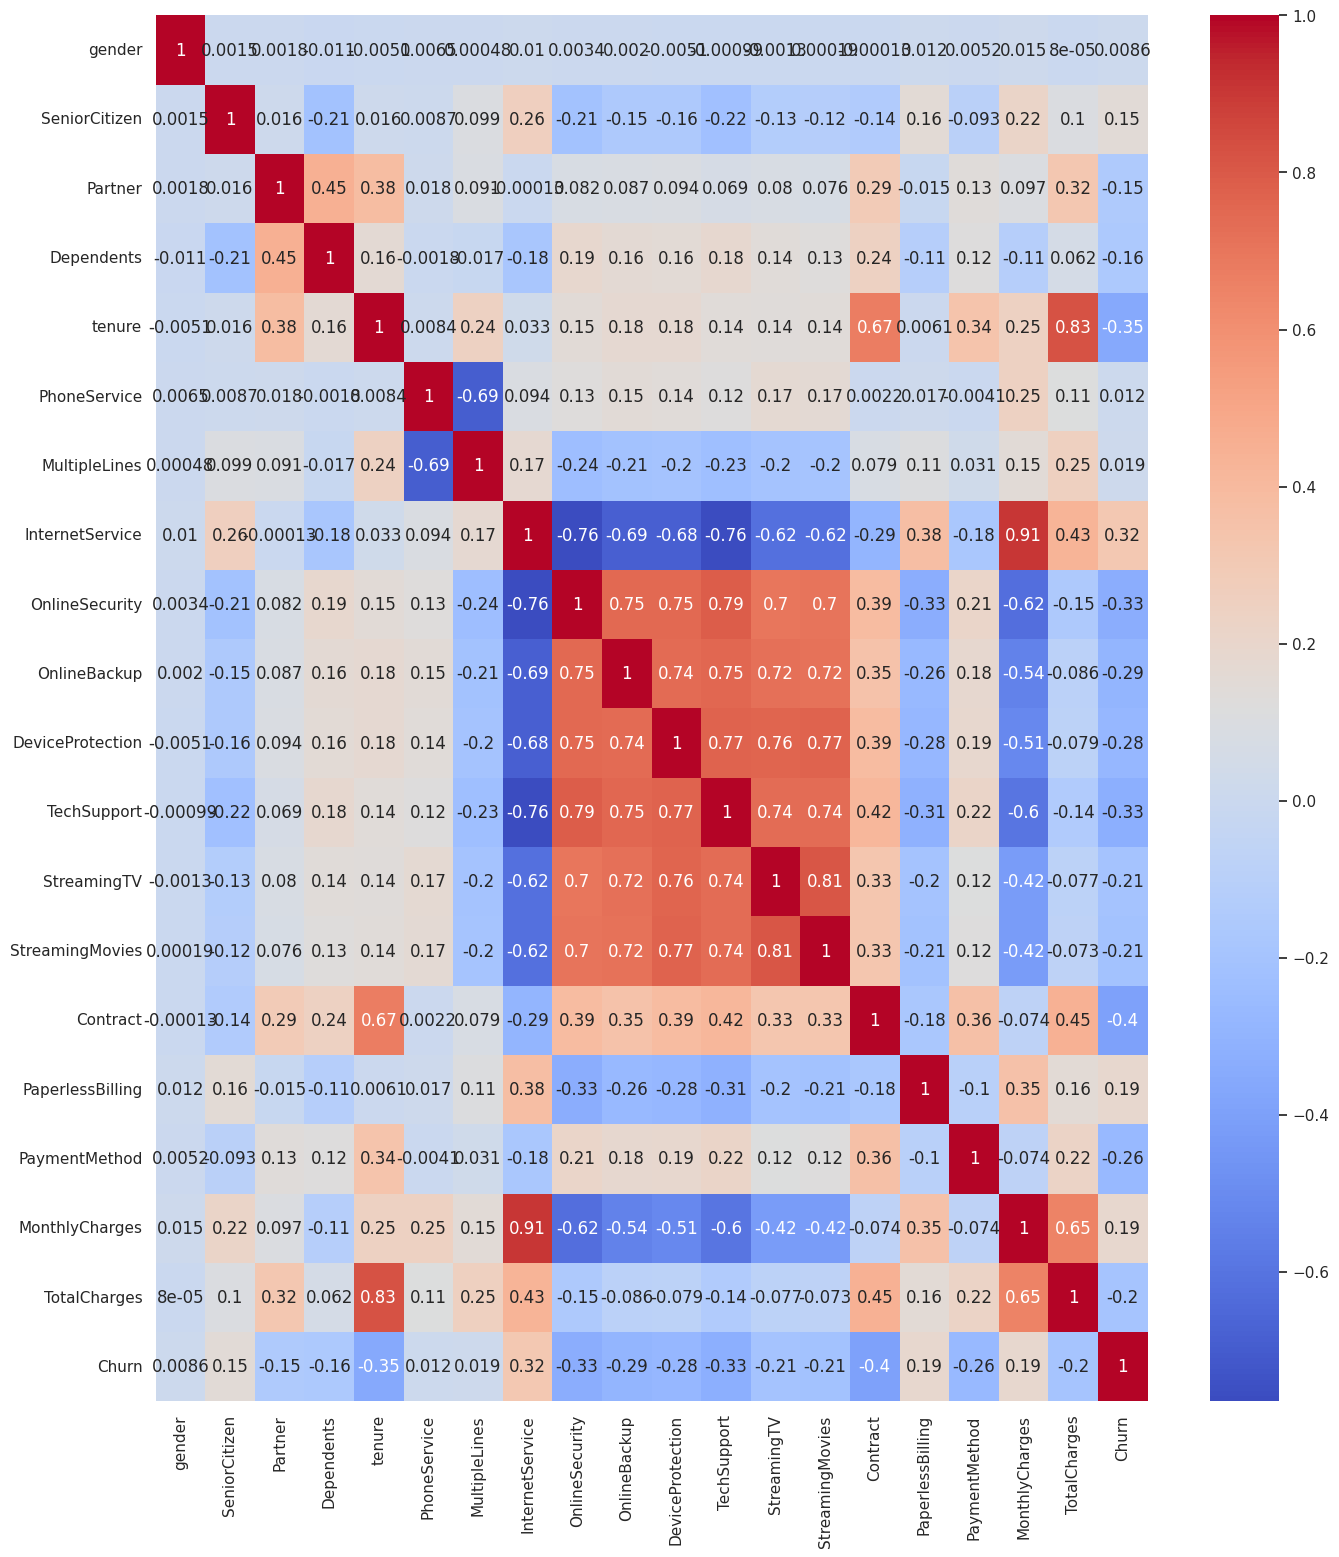

In [126]:
plt.figure(figsize = (16, 18))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

#TEST TRAIN SPLIT

In [128]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [152]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5282, 19) (1761, 19) (5282,) (1761,)


#ML

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [166]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
linear_model.predict(X_test)     #predict
linear_model.score(X_test, y_test)

0.2860437653996848

In [156]:
linear_model.score(X_test, y_test)

0.2860437653996848

In [161]:
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

0.7387847813742192

In [162]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Train the decision tree model
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = RF.predict(X_test)
RF.score(X_test, y_test)

0.8023850085178875

In [169]:
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
GBC.score(X_test, y_test)

0.8091993185689949

In [164]:
from lazypredict.Supervised import LazyClassifier

In [165]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate classifiers
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

 97%|█████████▋| 28/29 [00:17<00:00,  2.06it/s]

[LightGBM] [Info] Number of positive: 1435, number of negative: 3847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271677 -> initscore=-0.986129
[LightGBM] [Info] Start training from score -0.986129


100%|██████████| 29/29 [00:17<00:00,  1.67it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.77               0.77     0.77      0.79   
GaussianNB                         0.73               0.77     0.77      0.74   
BernoulliNB                        0.77               0.77     0.77      0.78   
NearestCentroid                    0.71               0.76     0.76      0.73   
Perceptron                         0.79               0.74     0.74      0.80   
SGDClassifier                      0.81               0.73     0.73      0.81   
LogisticRegression                 0.81               0.72     0.72      0.80   
LGBMClassifier                     0.81               0.72     0.72      0.80   
LinearDiscriminantAnalysis         0.80               0.72     0.72      0.80   
LinearSVC                          0.81               0.72     0.72      0.80   
AdaBoostClassifier          

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assume y_test and y_pred are already defined

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred_proba)  # y_pred_proba is the predicted probabilities for the positive class
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
#print('ROC-AUC:', roc_auc)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.8091993185689949
Precision: 0.6289473684210526
Recall: 0.5506912442396313
F1 Score: 0.5872235872235873
Confusion Matrix:
 [[1186  141]
 [ 195  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.63      0.55      0.59       434

    accuracy                           0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761

